<a href="https://colab.research.google.com/github/RuzannaRu/02-Data-Science-My-Mr-Clean-/blob/Ruzanna_Rikhsiboyeva/_My_Mr_Clean_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

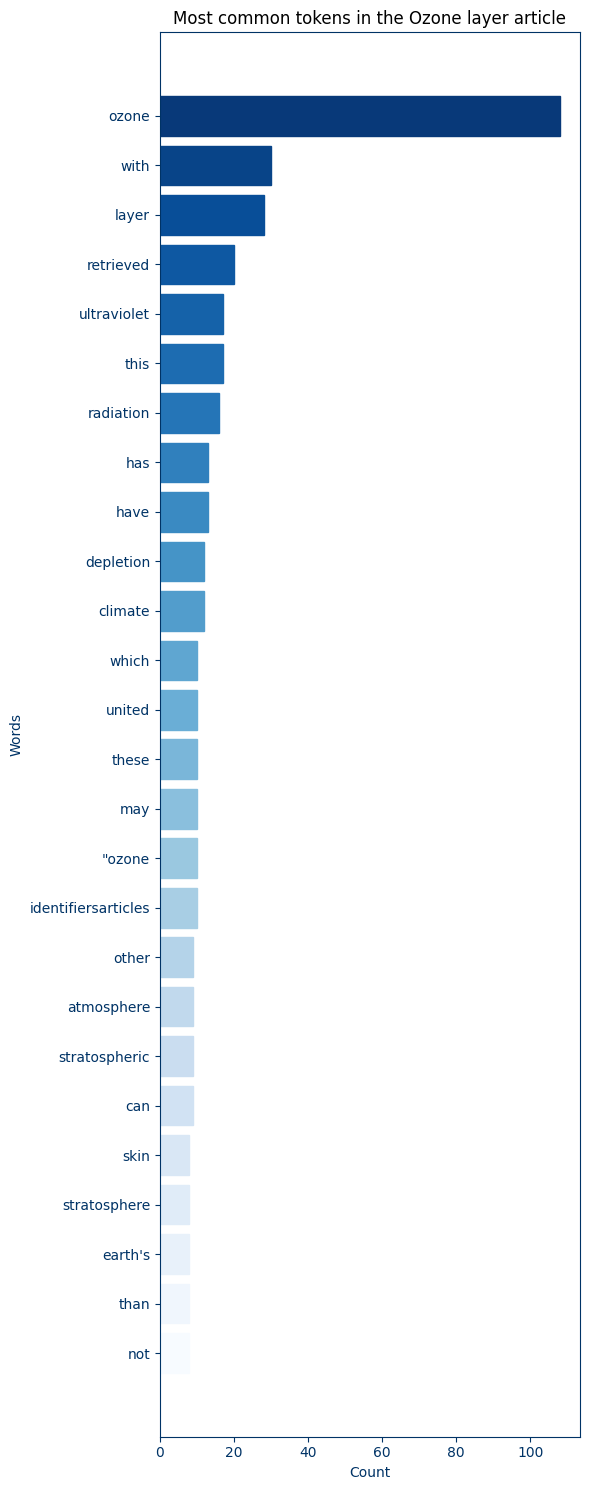

In [13]:
from operator import itemgetter
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def get_content(data):
  url = 'https://en.wikipedia.org/wiki/Ozone_layer'
  data = requests.get(url)
  return data

def merge_contents(data):
   merge_soup = BeautifulSoup(data.text, "html.parser")
   html_repos = merge_soup.find_all("div", id="bodyContent", class_="vector-body")
   return html_repos

def tokenize(merge_content):
    text = ''
    for content in merge_content:
        text += content.text + ' '
    arranged_words = text.split()
    return arranged_words

def remove_stop_words(collection):
    remove_stop_words = ["the", "a", "of", "to", "in", "about", "and", "is", "by", "^", "that", "from", "on", "for", "was", "at", "as", "are", "it", "be", "uv","nm)", "an"]
    filtered_result = []
    for word in collection:
        if not word.isdigit():
            if word.lower() not in remove_stop_words:
                filtered_result.append(word.lower())
    return filtered_result

def count_frequency(collection_filter):
    word_frequency = {word: collection_filter.count(word) for word in collection_filter}
    sorted_frequency = sorted(word_frequency.items(), key=itemgetter(1), reverse=True)
    words_26 = sorted_frequency[:min(26, len(sorted_frequency))]
    return words_26

def visualization_v(frequencies, ax=None, ascending_order=True):
    visualization = pd.DataFrame.from_dict(frequencies)
    visualization = visualization.rename(columns={0: 'words', 1: 'count'})
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 15))
    visualization = visualization.sort_values(by='count', ascending=ascending_order)
    num_colors = len(visualization)
    blues_cmap = plt.get_cmap('Blues')
    norm = mcolors.Normalize(vmin=0, vmax=num_colors)
    colors = [blues_cmap(norm(i)) for i in range(num_colors)]
    ax.barh(visualization['words'], visualization['count'], color=colors, edgecolor=colors)  # Исправлено здесь
    ax.set_xlabel('Count')
    ax.set_ylabel('Words')
    ax.set_title('Most common tokens in the Ozone layer article')
    if ax is None:
        plt.show()

def finish():
    url = 'https://en.wikipedia.org/wiki/Ozone_layer'
    data = get_content(url)
    merged_content = merge_contents(data)
    filtered_content = remove_stop_words(tokenize(merged_content))
    word_frequencies = count_frequency(filtered_content)
    fig, ax = plt.subplots(figsize=(6, 15))
    visualization_v(word_frequencies, ax=ax, ascending_order=True)
    ax.set_facecolor('white')
    color = '#003366'
    for spine in ax.spines.values():
        spine.set_color(color)
    ax.xaxis.label.set_color(color)
    ax.yaxis.label.set_color(color)
    ax.tick_params(axis='both', colors=color)
    ax.grid(False)
    plt.tight_layout()
    plt.show()

finish()
